In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://github.com/SharvaK/YBI-Foundation-Course/raw/Capstone/housing.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
y = df['median_house_value']

In [11]:
x = df.drop(['median_house_value','ocean_proximity'],axis=1)

In [14]:
y = np.array(y, dtype=int)
x = np.array(x, dtype=int)

In [25]:
x.shape

(20640, 8)

In [26]:
y.shape

(20640,)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size =0.7, random_state=192529)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((14447, 8), (6193, 8), (14447,), (6193,))

To balance x and y samples oversampling is used

In [36]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
ros = RandomOverSampler(random_state=192529)

In [53]:
x_ros, y_ros = ros.fit_resample(x_train,y_train)

In [54]:
x_ros.shape, y_ros.shape, x_train.shape,y_train.shape

((2419782, 8), (2419782,), (14447, 8), (14447,))

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [56]:
lr.fit(x_ros, y_ros)

LinearRegression()

In [57]:
y_pred = lr.predict(x_ros)

In [58]:
y_pred.shape

(2419782,)

In [59]:
y_pred

array([229198.30273032, 223216.07504404, 222948.26563509, ...,
       246334.2613565 , 231532.05091642, 235412.35986387])

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [60]:
mean_squared_error(y_pred,y_ros)

12139571415.094166

In [61]:
mean_absolute_error(y_pred,y_ros)

90632.168851792

In [62]:
r2_score(y_pred,y_ros)

-5.481694483881986

Text(0, 0.5, 'prediction')

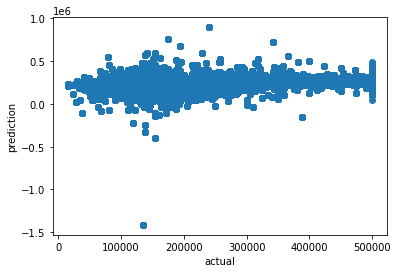

In [64]:
plt.scatter(y_ros,y_pred)
plt.xlabel('actual')
plt.ylabel('prediction')

